<a href="https://colab.research.google.com/github/koki-takada-1/machine-learning_summary/blob/main/pca_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 主成分分析の概要 <br>
1.サンプルデータの入力　<br>
RandomStateオブジェクトを使って、2変数のデータセットを生成し、各変数について標準化したものをプロット<br>
(1)`np.Random.RandomState(1)`：シード（乱数の初期値）を1に設定した`RandomState`オブジェクトを作成 <br>
　①rand関数とrandn関数を使って、2つの乱数を生成：sample.rand(2, 2), sample.randn(2, 200)の転置行列、の内積を求めて乱数値としている（X.shape→(2,200)) <br>
　②標準化(X_std)：平均0、分散1 <br>
　③①のX_stdの1列目と2列目の値の相関係数(sp.stats.pearsonr)：0.889と高い

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

相関係数0.889:


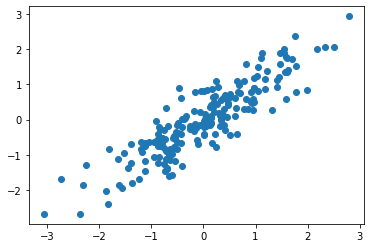

In [ ]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成 
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [ ]:
X[:10]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724],
       [-0.95892903, -0.26933102],
       [-0.67307991, -0.33830855],
       [ 1.30501861,  0.59135785],
       [ 0.3745456 , -0.0985442 ],
       [-1.82628627, -0.40617025]])

In [ ]:
X.shape

(200, 2)

In [ ]:
X_std[:10]

array([[-0.79965395, -0.52930205],
       [ 1.12539597,  1.89733254],
       [-0.76717536, -1.27081481],
       [-2.74504816, -1.68531797],
       [-0.60075004, -1.57782195],
       [-1.204604  , -0.8458552 ],
       [-0.85764625, -1.06581723],
       [ 1.54332881,  1.89879066],
       [ 0.41393991, -0.30123408],
       [-2.25738427, -1.28222104]])

In [ ]:
X_std.shape

(200, 2)

In [ ]:
#ご参考
#np.random.randn(2, 3)

In [ ]:
#sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]

2.主成分分析の実行 <br>
(1)sklearn.decompositionモジュールのPCAクラスを使用 <br>
(2)オブジェクトの初期化：<br>
n_components=2：抽出したい主成分の数（変数を何次元まで圧縮したいか）今回は2 <br>
(3)学習の実行(fit)：<br>
主成分の抽出に必要な情報を学習（固有値、固有ベクトルの計算）

In [ ]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

3.学習結果の確認 <br>
(1)components_属性： 固有ベクトル<br>
主成分分析により発見された新しい特徴空間の軸の向きを表す。<br>
第1主成分[-0.70710678 -0.70710678]、第2主成分[-0.70710678  0.70710678] <br>
<br>
(2)explained_variance_属性： 各主成分の分散<br>
[1.89888438 0.11116588] 主成分の分散の総和は2.0 = (標準化された)変数が元来有していた分散の総和 <br>
<br>
(3)explained_variance_ratio_属性：各主成分が持つ分散の比率 <br>
[0.94469498 0.05530502] 0.945 = 1.899/(1.899+0.111) 第1主成分で元のデータの94.5%の情報を保持していると読める <br>


In [ ]:
#components_属性（固有ベクトル）列ベクトル (1-1)
print(pca.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
#explained_variance_属性（各主成分の分散）（固有値）(1-2)
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.89888438 0.11116588]


In [ ]:
#explained_variance_ratio_属性（各主成分が持つ分散の比率）
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.94469498 0.05530502]


In [ ]:
#transformメソッドで主成分スコアを求める (1-3)
pca.fit_transform(np.transpose(np.array([X_std[:, 0], X_std[:, 1]])))[:10]

array([[ 0.9397138 ,  0.19116766],
       [-2.13739183,  0.54584158],
       [ 1.44107667, -0.35612687],
       [ 3.13274193,  0.7493424 ],
       [ 1.54048303, -0.69089417],
       [ 1.4498936 ,  0.25367371],
       [ 1.36009407, -0.14719911],
       [-2.43394601,  0.25134949],
       [-0.07969506, -0.50570438],
       [ 2.50287892,  0.68954453]])

In [ ]:
#loading(主成分負荷量)
pca.components_*np.c_[np.sqrt(pca.explained_variance_)]

array([[-0.97439324, -0.97439324],
       [-0.23576034,  0.23576034]])

以下の矢印が主成分分析によって得られた新しい特徴空間の軸の方向。<br>
分散が最大の方向に第1主成分が定まり、第2主成分とのベクトルに対して、お互いに直交<br>
ベクトルの[-0.707,-0.707]が第1主成分、[-0.707,0.707]が第2主成分の向き

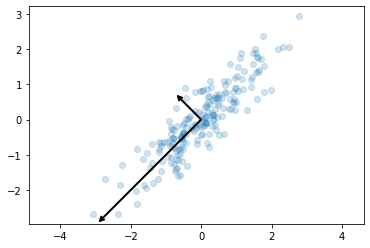

In [ ]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

In [ ]:
print('各主成分の平均:{}'.format(pca.mean_))

各主成分の平均:[-1.77635684e-17 -4.44089210e-18]


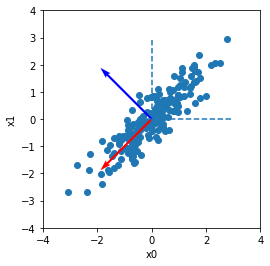

In [ ]:
# display 
fig = plt.figure()
axes = fig.add_subplot(111,aspect='equal')
axes.scatter(X_std[:,0],X_std[:,1])
axes.set_xlim([-4, 4])
axes.set_ylim([-4, 4])
axes.set_xlabel('x0')
axes.set_ylabel('x1')
axes.vlines(0,-0.2,3,linestyles='dashed')
axes.hlines(0,-0.2,3,linestyles='dashed')
axes.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0,0],pca.components_[0,1], color='red', width=0.01, scale=3)
axes.quiver(pca.mean_[0], pca.mean_[1], pca.components_[1,0],pca.components_[1,1], color='blue', width=0.01, scale=3)

以下、固有ベクトル、固有値、主成分スコアの求め方の比較検証を行う <br>
(1)pca:<br>
(1-1)固有ベクトル：components_属性　pca.components_ <br>
     [[-0.70710678 -0.70710678] [-0.70710678  0.70710678]] <br>
<br>
(1-2)固有値：explained_variance_属性 pca.explained_variance_ <br>
     [1.89888438 0.11116588] <br>
<br>
(1-3)主成分スコア：transformメソッド<br>
pca.fit_transform(np.transpose(np.array([X_std[:,0],X_std[:,1]]))) <br>
[[ 0.9397138 ,0.19116766],[-2.13739183,0.54584158],… <br>
<br>

(2)分散共分散行列から求める <br>
(2-0)分散共分散行列：<br>
point_array=np.cov(X_std, rowvar=0, bias=1) <br>
[[1,0.88938995],<br>
[0.88938995,1]]<br>

(2-1)固有ベクトル：<br>
(2-2)固有値: <br>
point_array_eig = np.linalg.eig(point_array) <br>
(array([0.11061005, 1.88938995]),  　→【固有値】<br>
 array([[-0.70710678,-0.70710678],　→【固有ベクトル】<br>
        [ 0.70710678,-0.70710678]]))<br>

(2-3)主成分スコア：元データ×固有ベクトル <br>
#元データ(200,2)×固有ベクトル(2,2)=主成分スコア(200,2)<br>
pca0 = np.dot(X_std,pca.components_)<br>
[[0.9397138 ,0.19116766],[-2.13739183,0.54584158],…<br>
<br>

→主成分負荷量を算出：<br>
pca.components_*np.c_[np.sqrt(pca.explained_variance_)]
<br>


In [ ]:
pca0=np.array

In [ ]:
#主成分スコアを求める(行列計算)
#元データ(200,2)×固有ベクトル(2,2)=主成分(200,2)
pca0 = np.dot(X_std,pca.components_)

In [ ]:
pca0[:10]

array([[ 0.9397138 ,  0.19116766],
       [-2.13739183,  0.54584158],
       [ 1.44107667, -0.35612687],
       [ 3.13274193,  0.7493424 ],
       [ 1.54048303, -0.69089417],
       [ 1.4498936 ,  0.25367371],
       [ 1.36009407, -0.14719911],
       [-2.43394601,  0.25134949],
       [-0.07969506, -0.50570438],
       [ 2.50287892,  0.68954453]])

In [ ]:
X_std[:10]

array([[-0.79965395, -0.52930205],
       [ 1.12539597,  1.89733254],
       [-0.76717536, -1.27081481],
       [-2.74504816, -1.68531797],
       [-0.60075004, -1.57782195],
       [-1.204604  , -0.8458552 ],
       [-0.85764625, -1.06581723],
       [ 1.54332881,  1.89879066],
       [ 0.41393991, -0.30123408],
       [-2.25738427, -1.28222104]])

In [ ]:
#分散共分散行列 (2-0)
point_array=np.cov(X_std, rowvar=0, bias=1)
point_array

array([[1.        , 0.88938995],
       [0.88938995, 1.        ]])

In [ ]:
#固有値、固有ベクトルを算出(独自計算) (2-1)(2-2)
# point_arrayの固有値と固有ベクトル
# インデクス0に固有値、インデクス1に固有ベクトルが格納される
point_array_eig = np.linalg.eig(point_array)
point_array_eig

(array([0.11061005, 1.88938995]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [ ]:
#pca1 = np.dot(point_array,pca.components_)

In [ ]:
#pca1

In [ ]:
#loading(主成分負荷量) (主因子法)
pca.components_*np.c_[np.sqrt(pca.explained_variance_)]

array([[-0.97439324, -0.97439324],
       [-0.23576034,  0.23576034]])